In [23]:
#!kaggle datasets download binovi/wholesale-customers-data-set -p ./Data

In [24]:
#!unzip ./Data/wholesale-customers-data-set.zip -d ./Data

In [25]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv('./Data/Wholesale customers data.csv')

In [27]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [28]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [30]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)

In [31]:
pca_data

array([[ 8.43938928e-01, -5.15350749e-01],
       [ 1.06267645e+00, -4.84601258e-01],
       [ 1.26914052e+00,  6.82054553e-01],
       [-1.05678239e+00,  6.10821496e-01],
       [ 6.34030484e-01,  9.74198836e-01],
       [ 5.30110898e-01, -5.85411382e-01],
       [ 3.99560245e-01, -8.46342878e-01],
       [ 7.91165650e-01, -4.61140175e-01],
       [-6.63831131e-01, -5.77465454e-01],
       [ 2.15068480e+00, -6.17913981e-01],
       [ 1.25599389e+00, -5.12452434e-01],
       [-1.68210612e-01, -6.88796117e-01],
       [ 1.43985588e+00,  6.08852947e-01],
       [ 1.40695611e+00, -1.60564663e-01],
       [ 1.37395999e+00,  6.85013841e-02],
       [-1.07181521e+00, -5.19859188e-01],
       [ 1.25801233e+00, -1.12165441e+00],
       [-6.18599013e-01,  2.82406711e-01],
       [ 8.67093429e-01,  2.20448419e-01],
       [-4.84666795e-01, -5.76463994e-01],
       [ 3.31514687e-01, -1.94171620e-01],
       [-1.25444108e+00, -3.05734448e-01],
       [-6.95754707e-01,  2.16418147e+00],
       [ 4.

Elbow method

In [32]:
import matplotlib.pyplot as plt

inertias = []
K_range = range(1,11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertias.append(kmeans.inertia_)

In [33]:
inertias

[2151.589822364628,
 1279.2686845510614,
 889.7117585983333,
 670.9608133299852,
 421.3471867705632,
 343.8377034908485,
 292.40205075503053,
 253.83084866137278,
 211.7861353100797,
 190.92274188940792]

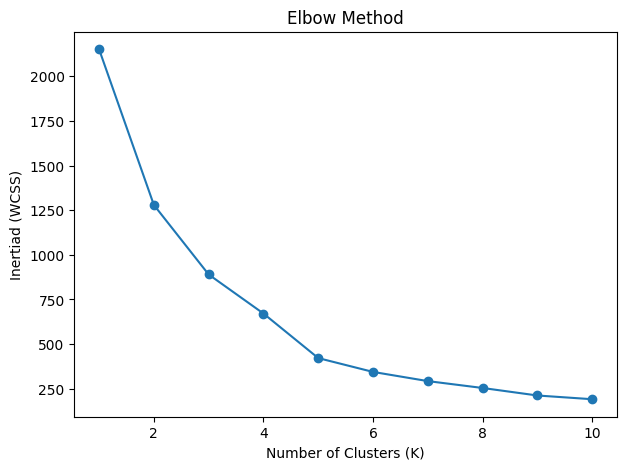

In [34]:
plt.figure(figsize=(7,5))
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertiad (WCSS)')
plt.title('Elbow Method')
plt.show()

Silhoutte score

In [35]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K_range = range(2,11) # silhouette de minimum 2 cluster olmalidir

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_data)
    score = silhouette_score(pca_data, labels)
    silhouette_scores.append(score)

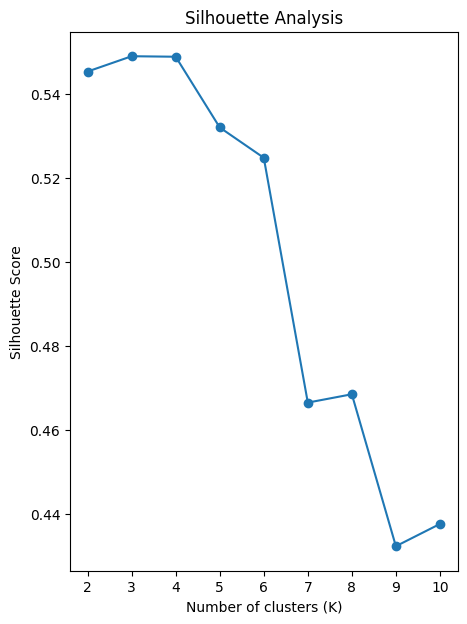

In [36]:
plt.figure(figsize=(5,7))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

In [37]:
final_kmeans = KMeans(n_clusters=4, random_state=42)
km_model = final_kmeans.fit_predict(pca_data)

In [38]:
silhouette_score(pca_data, km_model)

0.5488331352835831

In [39]:
km_model

array([0, 0, 0, 3, 1, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3,
       1, 2, 0, 0, 3, 3, 0, 3, 3, 3, 3, 1, 3, 0, 1, 0, 0, 1, 1, 3, 0, 0,
       0, 0, 0, 2, 0, 0, 3, 3, 3, 0, 3, 3, 2, 0, 3, 3, 0, 2, 0, 0, 3, 2,
       3, 0, 3, 3, 1, 1, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 2, 2, 1,
       3, 1, 3, 3, 2, 1, 0, 3, 0, 3, 3, 3, 0, 0, 0, 1, 3, 3, 0, 0, 0, 0,
       3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1, 3, 0, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0,
       1, 3, 3, 3, 3, 1, 0, 2, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 1, 1, 0,
       3, 3, 0, 0, 1, 3, 3, 0, 3, 0, 3, 0, 3, 2, 3, 3, 0, 0, 0, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3,
       0, 1, 0, 3, 0, 3, 3, 3, 3, 1, 3, 3, 1, 1, 3, 0, 3, 0, 1, 1, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0,

DBSCAN

In [40]:
dbscan = DBSCAN(eps=0.4, min_samples=5)
db_model = dbscan.fit_predict(pca_data)

In [41]:
set(db_model)

{np.int64(-1), np.int64(0)}

In [42]:
silhouette_score(pca_data, db_model)

0.5975597407321537

In [43]:
df['DB_Result'] = db_model
df['KM_Result'] = km_model

In [44]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,DB_Result,KM_Result
0,2,3,12669,9656,7561,214,2674,1338,0,0
1,2,3,7057,9810,9568,1762,3293,1776,0,0
2,2,3,6353,8808,7684,2405,3516,7844,-1,0
3,1,3,13265,1196,4221,6404,507,1788,0,3
4,2,3,22615,5410,7198,3915,1777,5185,-1,1
...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,-1,1
436,1,3,39228,1431,764,4510,93,2346,0,1
437,2,3,14531,15488,30243,437,14841,1867,-1,0
438,1,3,10290,1981,2232,1038,168,2125,0,3


In [45]:
import seaborn as sns

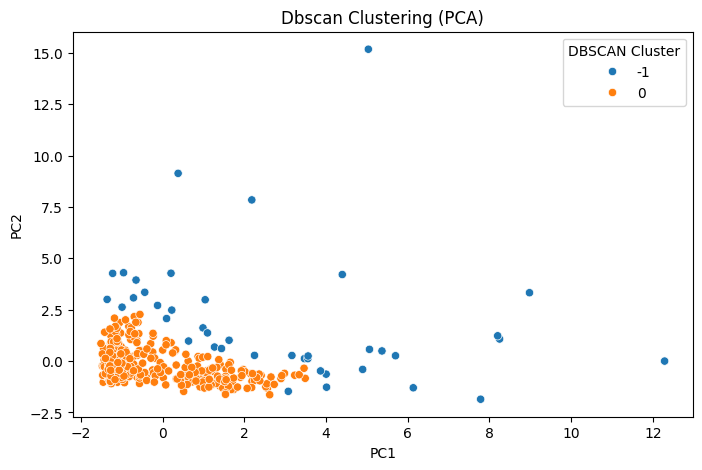

In [46]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=db_model, palette='tab10')
plt.title('Dbscan Clustering (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='DBSCAN Cluster')
plt.show()